In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
data = sns.load_dataset("titanic")

# Vue d'ensemble sur le dataset

In [108]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [110]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [111]:
data.isna().sum()  #You can also use isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [112]:
data = data.drop(columns=["sibsp", "parch", "fare", "embarked", "class", "adult_male","deck", "embark_town", "alive", "alone"], axis=1)

In [113]:
data.head()

,survived,pclass,sex,age,who
0,0,3,male,22.0,man
1,1,1,female,38.0,woman
2,1,3,female,26.0,woman
3,1,1,female,35.0,woman
4,0,3,male,35.0,man


In [114]:
data.tail()

,survived,pclass,sex,age,who
886,0,2,male,27.0,man
887,1,1,female,19.0,woman
888,0,3,female,NaN,woman
889,1,1,male,26.0,man
890,0,3,male,32.0,man


In [115]:
print(data)

     survived  pclass     sex   age    who
0           0       3    male  22.0    man
1           1       1  female  38.0  woman
2           1       3  female  26.0  woman
3           1       1  female  35.0  woman
4           0       3    male  35.0    man
..        ...     ...     ...   ...    ...
886         0       2    male  27.0    man
887         1       1  female  19.0  woman
888         0       3  female   NaN  woman
889         1       1    male  26.0    man
890         0       3    male  32.0    man

[891 rows x 5 columns]


# Nettoyage du dataset

### 1- Numérisation des variables

In [116]:
data["sex"].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OneHotEncoder(sparse=False)
label_encoder = LabelEncoder()


In [118]:
data["sex"] = label_encoder.fit_transform(data["sex"])
data["who"] = label_encoder.fit_transform(data["sex"])

In [119]:
# Colonnes catégorielles à encoder
categorical_cols = ['who','sex']

encoded_cols = encoder.fit_transform(data[categorical_cols])

# Convertir en DataFrame avec des noms de colonnes
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Concaténer les colonnes encodées au DataFrame original
df_encoded = pd.concat([data.drop(categorical_cols, axis=1), encoded_df], axis=1)

/home/farid/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [120]:
df_encoded.head()

,survived,pclass,age,who_0,who_1,sex_0,sex_1
0,0,3,22.0,0.0,1.0,0.0,1.0
1,1,1,38.0,1.0,0.0,1.0,0.0
2,1,3,26.0,1.0,0.0,1.0,0.0
3,1,1,35.0,1.0,0.0,1.0,0.0
4,0,3,35.0,0.0,1.0,0.0,1.0


In [121]:
df_encoded["age"].fillna(df_encoded['age'].median(), inplace=True)

In [122]:
df_encoded.isna().sum()

survived    0
pclass      0
age         0
who_0       0
who_1       0
sex_0       0
sex_1       0
dtype: int64

## 2- Valeurs abérrantes

In [123]:
df_encoded["age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

<Axes: >

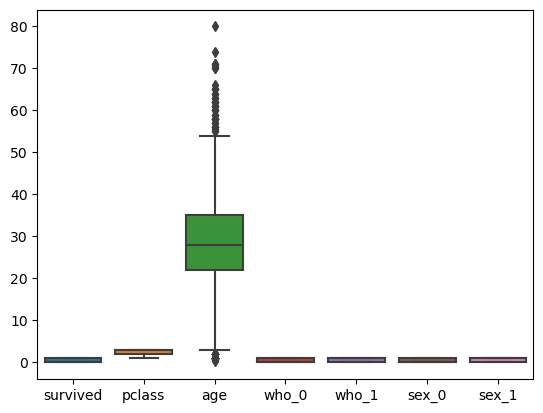

In [125]:
sns.boxplot(df_encoded)

<Axes: ylabel='Frequency'>

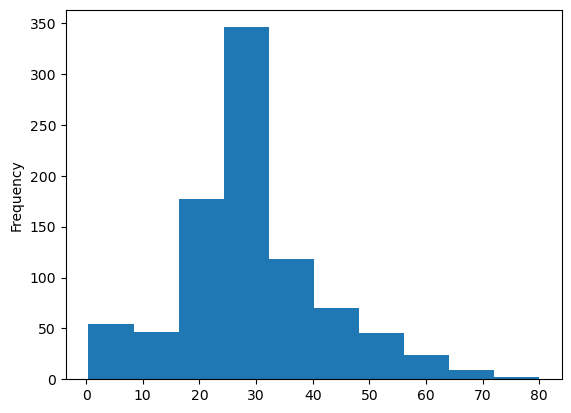

In [127]:
df_encoded['age'].plot(kind="hist")